<h1 align="center"> Machine Learning: Assignment 1</h1><br>

In [2]:
%matplotlib inline
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from pylab import rcParams

<h2 align="center"> Problem 1</h2><br>

<strong><p style="font-size:120%;"></strong> Download the Weather data set (a simple data set describing whether or not to play tennis based on the weather conditions)

In [3]:
weather = pd.read_csv('data/weather_dataset.csv')

<strong></strong> Represent the following table using 
a data structure of your choice



In [4]:
weather

Day   outlook  temperature  humidity  windy play
0     1     sunny           85        85  False   no
1     2     sunny           80        90   True   no
2     3  overcast           83        86  False  yes
3     4     rainy           70        96  False  yes
4     5     rainy           68        80  False  yes
5     6     rainy           65        70   True   no
6     7  overcast           64        65   True  yes
7     8     sunny           72        95  False   no
8     9     sunny           69        70  False  yes
9    10     rainy           75        80  False  yes
10   11     sunny           75        70   True  yes
11   12  overcast           72        90   True  yes
12   13  overcast           81        75  False  yes
13   14     rainy           71        91   True   no

In [5]:
#check the datatypes of each column 
weather.dtypes

Day             int64
outlook        object
temperature     int64
humidity        int64
windy            bool
play           object
dtype: object

<ul>
  <li>Calculate the mean temperature and mean humidity</li>
  <li>Print outlook and play for 
those days where the temperature is greater than the 
average temperature</li>
  <li>Print outlook and play for those days where the humidity is greater than the 
average humidity</li>
  <li>Convert the temperature
to Celsius and add a new column therefore in the table. 
Use the following conversion equation</li>C = (F-32) *5/9
</ul>

In [6]:
mean_temp = np.sum(weather.temperature.values) / float(len(weather.temperature.values))
mean_humid = np.sum(weather.humidity.values) / float(len(weather.humidity.values))

print 'mean temperature: ', mean_temp
print 'mean humid: ', mean_humid

mean temperature:  73.5714285714
mean humid:  81.6428571429


Print outlook and play for those days where the temperature is greater than the average temperature

In [7]:
temp_condition = weather['temperature'] > mean_temp

great_mean_temp = weather[['Day','outlook']][temp_condition]
pd.DataFrame(great_mean_temp)

Day   outlook
0     1     sunny
1     2     sunny
2     3  overcast
9    10     rainy
10   11     sunny
12   13  overcast

Print outlook and play for those days where the humidity is greater than the average humidity

In [8]:
humid_condition = weather['humidity'] > mean_humid

great_mean_humid = weather[['Day','outlook']][humid_condition]
pd.DataFrame(great_mean_humid)

Day   outlook
0     1     sunny
1     2     sunny
2     3  overcast
3     4     rainy
7     8     sunny
11   12  overcast
13   14     rainy

Convert the temperature
to Celsius and add a new column therefore in the table. 
Use the following conversion equation 
C = (F-32) *5/9 

In [9]:
weather['Celsius'] = weather['temperature'].apply(lambda x:(x -32.0) *5.0/9)
weather

Day   outlook  temperature  humidity  windy play    Celsius
0     1     sunny           85        85  False   no  29.444444
1     2     sunny           80        90   True   no  26.666667
2     3  overcast           83        86  False  yes  28.333333
3     4     rainy           70        96  False  yes  21.111111
4     5     rainy           68        80  False  yes  20.000000
5     6     rainy           65        70   True   no  18.333333
6     7  overcast           64        65   True  yes  17.777778
7     8     sunny           72        95  False   no  22.222222
8     9     sunny           69        70  False  yes  20.555556
9    10     rainy           75        80  False  yes  23.888889
10   11     sunny           75        70   True  yes  23.888889
11   12  overcast           72        90   True  yes  22.222222
12   13  overcast           81        75  False  yes  27.222222
13   14     rainy           71        91   True   no  21.666667

<strong><p style="font-size:120%;">1.</strong> How often do you play tennis independent of the other attributes?

In [10]:
def NoString(x):
    if x == 'no':
        y = 0
    else:
        y = 1.0
    return y

weather.play = weather.play.apply(NoString)
print weather.play.sum()/float(len(weather.play))
weather.play.head(15)

0.642857142857


0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: float64

<strong><p style="font-size:120%;">2.</strong> How often do you play tennis when it is &quot;sunny&quot;?

In [11]:
#data.groupby('month')['date'].count()
len(weather[(weather['outlook'] == 'sunny') & (weather['play'] == 1)]) / float(len(weather))
#weather[weather.outlook == 'sunny'].play

0.14285714285714285

<strong><p style="font-size:120%;">3.</strong> Compare the average, minimum and maximum temperature when you play tennis?

In [12]:
weather

Day   outlook  temperature  humidity  windy  play    Celsius
0     1     sunny           85        85  False     0  29.444444
1     2     sunny           80        90   True     0  26.666667
2     3  overcast           83        86  False     1  28.333333
3     4     rainy           70        96  False     1  21.111111
4     5     rainy           68        80  False     1  20.000000
5     6     rainy           65        70   True     0  18.333333
6     7  overcast           64        65   True     1  17.777778
7     8     sunny           72        95  False     0  22.222222
8     9     sunny           69        70  False     1  20.555556
9    10     rainy           75        80  False     1  23.888889
10   11     sunny           75        70   True     1  23.888889
11   12  overcast           72        90   True     1  22.222222
12   13  overcast           81        75  False     1  27.222222
13   14     rainy           71        91   True     0  21.666667

In [13]:
print 'mean:', weather[(weather['play'] == 1)]['temperature'].mean()
print 'min:', weather[(weather['play'] == 1)]['temperature'].min()
print 'max:', weather[(weather['play'] == 1)]['temperature'].max()

mean: 73.0
min: 64
max: 83


<strong><p style="font-size:120%;">4.</strong> Compare the average, minimum and maximum humidity when you play tennis?

In [14]:
print 'mean:', weather[(weather['play'] == 1)]['humidity'].mean()
print 'min:', weather[(weather['play'] == 1)]['humidity'].min()
print 'max:', weather[(weather['play'] == 1)]['humidity'].max()

mean: 79.1111111111
min: 65
max: 96


<strong><p style="font-size:120%;">5.</strong> Plot a scatter plot (x,y diagramm) of humidity (x) and temperature (y) when you play tennis compared to when you do not play tennis. 

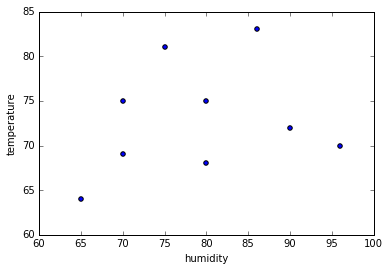

In [15]:
#play tennis 
weather[(weather['play'] == 1)].plot(kind='scatter', x='humidity', y='temperature')

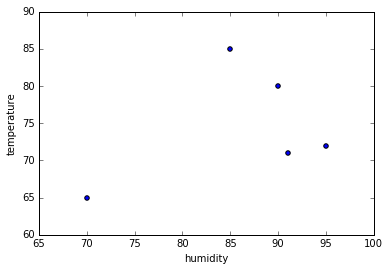

In [16]:
# NO tennis 
weather[(weather['play'] == 0)].plot(kind='scatter', x='humidity', y='temperature')

<h2 align="center"> Problem 2</h2><br>

In [17]:
#!bash getLineNum.sh
# this gets the line numbers where WY, US, and AL occur

In [18]:
files = ["new_data/st0009ts.txt", "new_data/st1019ts.txt",\
         "new_data/st2029ts.txt", "new_data/st3039ts.txt",\
         "new_data/st4049ts.txt", "new_data/st5060ts.txt",\
         "new_data/st6070ts.txt", "new_data/st7080ts.txt",\
         "new_data/st8090ts.txt"]
data = ["data/st0009ts.txt", "data/st1019ts.txt",\
         "data/st2029ts.txt", "data/st3039ts.txt",\
         "data/st4049ts.txt", "data/st5060ts.txt",\
         "data/st6070ts.txt", "data/st7080ts.txt",\
         "data/st8090ts.txt"]

f1 = pd.read_fwf("new_data/st0009ts.txt",header = None,  names=["new_data/st0009ts.txt"]);
for f in files[1:]: 
    f2 = pd.read_fwf( f ,header = None,  names=[f]);
    f1 = pd.concat([f1, f2], axis=1)
f1

new_data/st0009ts.txt  new_data/st1019ts.txt  new_data/st2029ts.txt  \
WY                     72                     72                     72   
US                     18                     18                     18   
AL                     24                     24                     24   

    new_data/st3039ts.txt  new_data/st4049ts.txt  new_data/st5060ts.txt  \
WY                     72                     70                     78   
US                     18                     16                     19   
AL                     24                     22                     28   

    new_data/st6070ts.txt  new_data/st7080ts.txt  new_data/st8090ts.txt  
WY                     75                     65                     62  
US                     19                      5                      4  
AL                     25                     15                     12

In [35]:
import os 
count = 0; 

for index, data_file in enumerate(data):
    
    if index == 0:
        end_line = f1[files[index]].max()
        start_line = f1[files[index]].min()
        !sed "$(($start_line-2)),$(($end_line))!d" "$data_file">>data/1st0009ts.txt
        df = pd.read_fwf('data/1st0009ts.txt',header = 0, index_col=0, thousands=",")
        #df = df.fillna(float(0.0))
        #df = df.apply(lambda x: x.str.replace(',', "") if type(x) == str else x)
        #df.apply(lambda s:s.str.replace(',', ""))
        os.remove('data/1st0009ts.txt')
        df = df.dropna()   
    elif index == 1 or index == 2 or index == 3 or index == 4:
        end_line = f1[files[index]].max()
        start_line = f1[files[index]].min()
        !sed "$(($start_line-2)),$(($end_line))!d" "$data_file">>data/1st0009ts.txt
        new_df = pd.read_fwf('data/1st0009ts.txt',header = 0, index_col=0, thousands=",")
        os.remove('data/1st0009ts.txt')
        new_df = new_df.dropna() 
    elif index == 5:
        end_line = f1[files[index]].max()
        start_line = f1[files[index]].min()
        !sed "$(($start_line-2)),$(($end_line))!d" "$data_file">>data/1st0009ts.txt
        new_df= pd.read_fwf('data/1st0009ts.txt',header = 0, index_col=0, thousands=",")
        os.remove('data/1st0009ts.txt')
        new_df = new_df.dropna() 
        new_df.columns = ['1950', '1950.1', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960']
    elif index == 6:
        end_line = f1[files[index]].max()
        start_line = f1[files[index]].min()
        !sed "$(($start_line-2)),$(($end_line))!d" "$data_file">>data/1st0009ts.txt
        new_df= pd.read_fwf('data/1st0009ts.txt',header = 0, index_col=0, thousands=",")
        os.remove('data/1st0009ts.txt')
        new_df = new_df.dropna() 
    elif index == 7:
        temp = f1
        last_two = temp.drop(['US'])
        end_line = last_two[files[index]].max()
        start_line = last_two[files[index]].min()
        !sed "$(($start_line-1)),$(($end_line+1))!d" data/st7080ts.txt >> data/1st0009ts.txt
        new_df = pd.read_fwf('data/1st0009ts.txt',header = 0, index_col=1, thousands=",")
        os.remove('data/1st0009ts.txt')
        new_df.index.name = None
        new_df.drop('Fip', axis=1, inplace=True)
        new_df.columns = ['1970', '1971', '1972', '1973', '1974',\
                      '1975', '1976', '1977', '1978', '1979', '1980']
        new_df = new_df.dropna() 
    elif index == 8:
        end_line = f1[files[index]].max()
        start_line = f1[files[index]].min()
        !sed "$(($start_line+6)),$(($end_line))!d" "$data_file">>data/1st0009ts.txt
        new_df= pd.read_fwf('data/1st0009ts.txt',header = 0, index_col=0, thousands=",")
        os.remove('data/1st0009ts.txt')
        new_df.columns = ['1980', '1981', '1982', '1983', '1984',\
                      '1985', '1986', '1987', '1988', '1989', '1990']
        new_df = new_df.dropna() 
    else: 
        break;
    if index != 0:
        df = pd.concat([df, new_df], axis=1)



#df = df.apply(lambda s:s.str.replace(',', ""))
df = df.fillna(float(0.0))
df
# .apply(lambda x: 'true' if x <= 2.5 else 'false')

1900   1901   1902   1903   1904   1905  1906   1907   1908  \
AK                 0      0      0      0      0      0     0      0      0   
AL              1830   1907   1935   1957   1978   2012  2045   2058   2070   
AR              1314   1341   1360   1384   1419   1447  1465   1484   1513   
AZ               124    131    138    144    151    158   167    176    186   
CA              1490   1550   1623   1702   1792   1893  1976   2054   2161   
CO               543    581    621    652    659    680   707    733    757   
CT               910    931    952    972    987   1010  1033   1057   1077   
DC               278    285    290    295    302    308   313    317    321   
DE               185    187    188    190    192    194   196    197    199   
FL               530    544    565    587    599    615   628    645    684   
GA              2220   2263   2305   2346   2387   2427  2466   2505   2543   
HI                 0      0      0      0      0      0     0      0      0   
IA              2231   2227   2222   2217   2212   2211  2214   2217   2220   
ID               163    176    199    216    229    246   262    277    291   
IL              4828   4914   4992   5071   5161   5241  5309   5384   5474   
IN              2518   2541   2567   2594   2614   2635  2663   2679   2677   
KS              1473   1490   1505   1498   1527   1555  1576   1612   1629   
KY              2148   2162   2177   2191   2205   2220  2234   2249   2263   
LA              1384   1412   1440   1467   1495   1523  1551   1579   1607   
MA              2788   2794   2856   2924   2969   3018  3107   3183   3251   
MD              1189   1200   1210   1209   1217   1237  1251   1257   1269   
ME               695    699    703    709    719    723   729    731    735   
MI              2423   2450   2477   2505   2534   2579  2626   2693   2722   
MN              1754   1805   1862   1901   1945   1981  1987   1995   2020   
MO              3108   3128   3147   3166   3185   3204  3223   3242   3260   
MS              1553   1578   1603   1628   1653   1678  1703   1728   1753   
MT               245    261    270    282    293    305   322    332    346   
Midwest            0      0      0      0      0      0     0      0      0   
NC              1897   1926   1956   1986   2017   2051  2077   2105   2142   
ND               321    346    371    396    421    446   474    501    528   
NE              1067   1078   1089   1104   1119   1129  1138   1149   1161   
NH               412    412    409    394    407    423   415    423    428   
NJ              1884   1889   1917   1969   2050   2151  2239   2314   2403   
NM               196    206    218    229    242    255   269    283    298   
NV                43     45     49     52     56     59    64     68     73   
NY              7283   7449   7612   7771   7927   8084  8289   8499   8714   
North Central  26359  26722  27126  27446  27830  28203  8524  28868  29187   
Northeast      21059  21401  21815  22248  22716  23214  3769  24320  24879   
OH              4161   4216   4322   4386   4458   4530  4587   4630   4677   
OK               800    916   1027   1118   1200   1277  1349   1414   1498   
OR               415    434    454    479    504    530   555    580    610   
PA              6313   6439   6567   6699   6833   6970  7110   7253   7398   
RI               430    441    450    460    471    481   492    505    519   
SC              1342   1361   1379   1397   1415   1433  1451   1468   1485   
SD               403    418    431    437    452    461   477    498    527   
South          24565  25114  25599  26055  26492  27003  7475  27879  28406   
TN              2023   2041   2060   2082   2086   2111  2136   2136   2164   
TX              3055   3132   3210   3291   3374   3459  3546   3636   3727   
U.S.           76094  77585  79160  80632  82165  83820  5437  87000  88709   
US                 0      0      0      0      0      0     0     

<h2 align="center"> Problem 5</h2><br>

In [24]:
if type('lama') == str:
    print "sex"

sex
